In [1]:
# Cell 1 — Install required packages (run once in Colab)
%pip install -q plotly kaleido


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.3/66.3 kB 1.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.4/56.4 kB 1.4 MB/s eta 0:00:00


In [3]:
# Cell 2 — Imports & load Titanic dataset
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go

# plotting defaults
%matplotlib inline
sns.set(style="whitegrid")

# load dataset (seaborn builtin)
titanic = sns.load_dataset('titanic')


titanic.head()


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [6]:
# Cell 3 — Basic cleaning & derived columns
df = titanic.copy()

# fill missing values
df['deck'] = df['deck'].astype(str).fillna('Unknown')
df['embarked'] = df['embarked'].astype(str).fillna('Unknown')
df['fare'] = df['fare'].fillna(df['fare'].median())
df['age'] = df['age'].fillna(df['age'].median())

# create age groups
df['age_group'] = pd.cut(df['age'],
                         bins=[0,12,18,30,50,80],
                         labels=['Child','Teen','Young Adult','Adult','Senior'])

# ensure survived is integer
df['survived'] = df['survived'].astype(int)

# show shape and missing values
print("Shape:", df.shape)
df.isna().sum()


Shape: (891, 16)


,0
survived,0
pclass,0
sex,0
age,0
sibsp,0
parch,0
fare,0
embarked,0
class,0
who,0


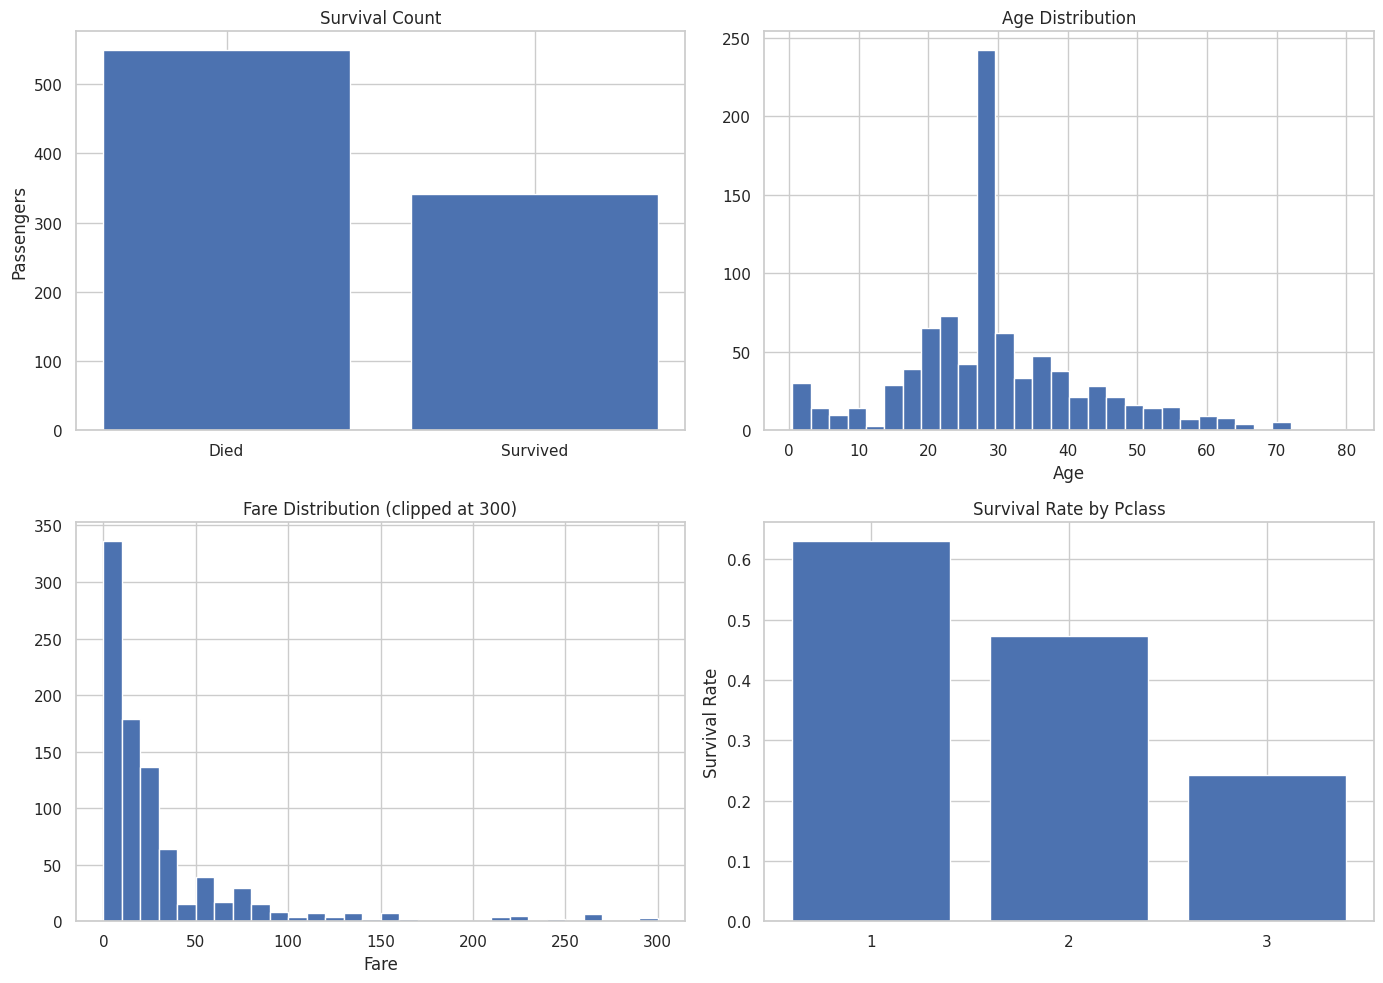

In [7]:
# Cell 4 — Matplotlib visuals
fig, axes = plt.subplots(2, 2, figsize=(14,10))

# 1) Survival counts (bar)
axes[0,0].bar(['Died','Survived'], df['survived'].value_counts().sort_index().values)
axes[0,0].set_title('Survival Count')
axes[0,0].set_ylabel('Passengers')

# 2) Age distribution (hist)
axes[0,1].hist(df['age'].dropna(), bins=30)
axes[0,1].set_title('Age Distribution')
axes[0,1].set_xlabel('Age')

# 3) Fare distribution (log scale histogram)
axes[1,0].hist(df['fare'].clip(upper=300), bins=30)  # clip large outliers for clarity
axes[1,0].set_title('Fare Distribution (clipped at 300)')
axes[1,0].set_xlabel('Fare')

# 4) Survival rate by Pclass (bar)
surv_by_class = df.groupby('pclass')['survived'].mean()
axes[1,1].bar(surv_by_class.index.astype(str), surv_by_class.values)
axes[1,1].set_title('Survival Rate by Pclass')
axes[1,1].set_ylabel('Survival Rate')

plt.tight_layout()
plt.show()


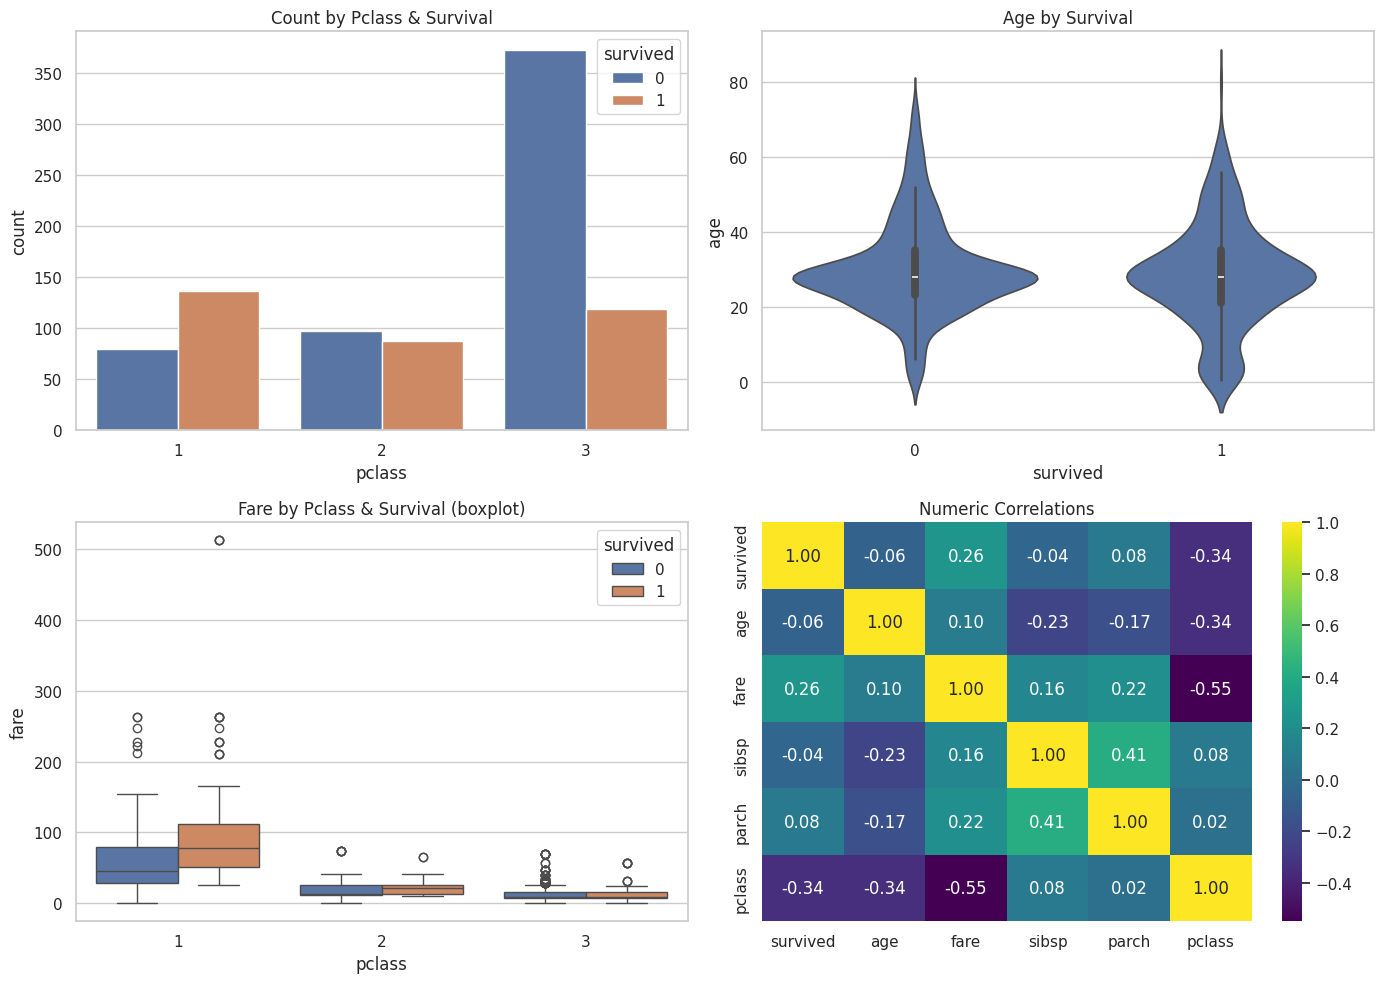

In [8]:
# Cell 5 — Seaborn visuals
plt.figure(figsize=(14,10))

# 1) Countplot by class + hue survived
plt.subplot(2,2,1)
sns.countplot(data=df, x='pclass', hue='survived')
plt.title('Count by Pclass & Survival')

# 2) Violin: Age distribution by survival
plt.subplot(2,2,2)
sns.violinplot(data=df, x='survived', y='age')
plt.title('Age by Survival')

# 3) Boxplot: Fare by class & survival
plt.subplot(2,2,3)
sns.boxplot(data=df, x='pclass', y='fare', hue='survived')
plt.title('Fare by Pclass & Survival (boxplot)')

# 4) Heatmap: correlations for numeric columns
plt.subplot(2,2,4)
num_cols = ['survived','age','fare','sibsp','parch','pclass']
sns.heatmap(df[num_cols].corr(), annot=True, fmt=".2f", cmap='viridis')
plt.title('Numeric Correlations')

plt.tight_layout()
plt.show()


In [10]:
!pip install -U plotly>=6.1.1


In [11]:
# Cell 7 — Plotly interactive visuals
# 1) Interactive scatter: Age vs Fare colored by survival
fig = px.scatter(df, x='age', y='fare', color=df['survived'].map({0:'Died',1:'Survived'}),
                 hover_data=['sex','pclass','embarked'], title='Age vs Fare — Survival')
fig.update_layout(height=500)
fig.show()

# 2) Interactive bar: Survival rate by class
surv_rate = df.groupby('pclass', as_index=False)['survived'].mean()
surv_rate['survived_pct'] = 100 * surv_rate['survived']
fig = px.bar(surv_rate, x='pclass', y='survived_pct', labels={'survived_pct':'Survival %','pclass':'Pclass'},
             title='Survival Percentage by Pclass', text='survived_pct')
fig.update_traces(texttemplate='%{text:.1f}%', textposition='outside')
fig.update_layout(yaxis=dict(range=[0,100]), height=450)
fig.show()

# 3) Sunburst: hierarchical breakdown by class -> sex -> survival
fig = px.sunburst(df, path=['pclass','sex', df['survived'].map({0:'Died',1:'Survived'})],
                  title='Passengers: Pclass → Sex → Survival', height=600)
fig.show()
